# Cell cycle model CG2MV001
**Cell cycle G2 phase module with constant mass model for mammalians ver. 001**

Packages

In [1]:
#using DifferentialEquations
using OrdinaryDiffEq, ParameterizedFunctions, NamedTuples
using PyDSTool, PyCall, PyPlot
using JLD

In [2]:
include("custom_functions.jl");
include("plot_functions.jl");

### Model system of ODE's

A model for the interphase is given by

\begin{align}
\frac{d MPF}{dt}       &= k_{m0}Mass - (k_{m2} + k_{m2a}Wee1)MPF + (k_{m1} + k_{m1a}Cdc25_{P}) MPF_{P} - k_{m3} MPF, \\ 
\frac{d MPF_{P}}{dt}   & = (k_{m2} + k_{m2b}Wee1) MPF - (k_{m1} + k_{m1a}Cdc25_{P}) MPF_{P} - k_{m3}MPF_{P},  \\
\frac{d Wee1}{dt}      &= V_{w1} \frac{Wee1_{T} - Wee1 }{J_{w1} + (Wee1_{T} - Wee1) }  - k_{w2} (MPF + \alpha MPF_{P}) \frac{Wee1}{J_{w2} + Wee1}, \\
\frac{d Cdc25_{P}}{dt} &= k_{c1} (MPF + \alpha MPF_{P}) \frac{Cdc25_{T} - Cdc25_{P}}{J_{c1} + (Cdc25_{T} - Cdc25_{P})}  - V_{c2}\frac{Cdc25_{P}}{J_{c2} + Cdc25_{P}}.
\end{align}

Model function

In [3]:
f = @ode_def_bare CG2MV001 begin
    ## System of ODE (vector field)
    dMPF     = k_m0*Mass - (k_m2 + k_m2a*Wee1)*MPF + (k_m1 + k_m1a*Cdc25_P)*MPF_P - k_m3*MPF
    dMPF_P   = (k_m2 + k_m2a*Wee1)*MPF - (k_m1 + k_m1a*Cdc25_P)*MPF_P - k_m3*MPF_P
    dWee1    = V_w1*(Wee1_T - Wee1)/(J_w1 + Wee1_T - Wee1) - k_w2*(MPF + MPF_P*alpha)*Wee1/(J_w2 + Wee1)
    dCdc25_P = k_c1*(MPF + MPF_P*alpha)*(Cdc25_T - Cdc25_P)/(J_c1 + Cdc25_T - Cdc25_P) - V_c2*Cdc25_P/(J_c2 + Cdc25_P)
end k_m0 k_m1 k_m1a k_m2 k_m2a k_m3 V_w1 k_w2 J_w1 J_w2 k_c1 V_c2 J_c1 J_c2 alpha Wee1_T Cdc25_T theta_M Mass

(::CG2MV001) (generic function with 2 methods)

In [4]:
params = @NT(k_m0=0.2, k_m1=0.4, k_m1a=20.0, k_m2=0.4, k_m2a=50.0, k_m3=0.2, V_w1=1.0, k_w2=5.3, J_w1=0.01, J_w2=0.01, k_c1=8.5, V_c2=1.4, J_c1=0.01, J_c2=0.01, alpha=0.05, Wee1_T=1.0, Cdc25_T=1.0, theta_M=0.2, Mass=0.5)

(k_m0 = 0.2, k_m1 = 0.4, k_m1a = 20.0, k_m2 = 0.4, k_m2a = 50.0, k_m3 = 0.2, V_w1 = 1.0, k_w2 = 5.3, J_w1 = 0.01, J_w2 = 0.01, k_c1 = 8.5, V_c2 = 1.4, J_c1 = 0.01, J_c2 = 0.01, alpha = 0.05, Wee1_T = 1.0, Cdc25_T = 1.0, theta_M = 0.2, Mass = 0.5)

**Some solutions**

**G2 stage**. Initial conditions and parameter options.

In [5]:
u0 = [0.006,      # MPF
      0.493,      # MPF_P
      0.998,      # Wee1
      0.002]      # Cdc25_P
tspan = (0.0, 40.0)
dtmax = 0.1
alg = Rosenbrock23()
prob = ODEProblem(f, u0, tspan, params)
sol = solve(prob, alg; (:dtmax, dtmax))
sol.errors

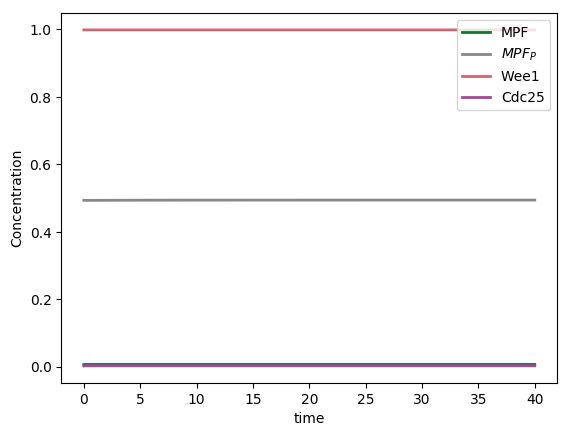

In [6]:
plot(sol.t, sol[1, :], lw=2, color=green2, label="MPF")
plot(sol.t, sol[2, :], lw=2, color=gray1, label=L"MPF_P")
plot(sol.t, sol[3, :], lw=2, color=red1, label="Wee1")
plot(sol.t, sol[4, :], lw=2, color=purple1, label="Cdc25")
xlabel("time")
ylabel("Concentration")
legend(loc="upper right");

In [7]:
sol.u[end]

4-element Array{Float64,1}:
 0.00633818
 0.493661  
 0.998056  
 0.00229217

**M phase**. Changing $Mass$ to 3.0. This moves the dynamics to oscillations.

In [8]:
params = @NT(k_m0=0.2, k_m1=0.4, k_m1a=20.0, k_m2=0.4, k_m2a=50.0, k_m3=0.2, V_w1=1.0, k_w2=5.3, J_w1=0.01, J_w2=0.01, k_c1=8.5, V_c2=1.4, J_c1=0.01, J_c2=0.01, alpha=0.05, Wee1_T=1.0, Cdc25_T=1.0, theta_M=0.2, Mass=3.0)

(k_m0 = 0.2, k_m1 = 0.4, k_m1a = 20.0, k_m2 = 0.4, k_m2a = 50.0, k_m3 = 0.2, V_w1 = 1.0, k_w2 = 5.3, J_w1 = 0.01, J_w2 = 0.01, k_c1 = 8.5, V_c2 = 1.4, J_c1 = 0.01, J_c2 = 0.01, alpha = 0.05, Wee1_T = 1.0, Cdc25_T = 1.0, theta_M = 0.2, Mass = 3.0)

In [9]:
u0 = [2.9381,      # MPF
      0.0619,      # MPF_P
      0.0006,      # Wee1
      0.9994]      # Cdc25_P
tspan=(0.0, 40.0)
prob = ODEProblem(f, u0, tspan, params)
dtmax = 0.001
sol = solve(prob, alg; (:dtmax, dtmax))
sol.errors

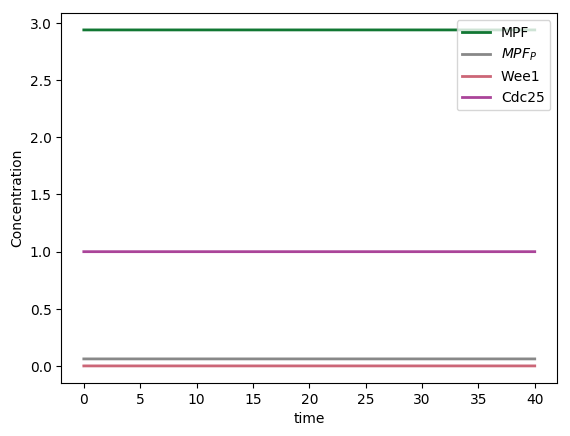

In [10]:
plot(sol.t, sol[1, :], lw=2, color=green2, label="MPF")
plot(sol.t, sol[2, :], lw=2, color=gray1, label=L"MPF_P")
plot(sol.t, sol[3, :], lw=2, color=red1, label="Wee1")
plot(sol.t, sol[4, :], lw=2, color=purple1, label="Cdc25")
xlabel("time")
ylabel("Concentration")
legend(loc="upper right");

In [11]:
sol.u[end]

4-element Array{Float64,1}:
 2.93808    
 0.061922   
 0.000678232
 0.999413   

## Bifurcation

**Following steady state with variable Mass**

In [20]:
params = @NT(k_m0=0.2, k_m1=0.4, k_m1a=20.0, k_m2=0.4, k_m2a=50.0, k_m3=0.2, V_w1=1.0, k_w2=5.3, J_w1=0.01, J_w2=0.01, k_c1=8.5, V_c2=1.4, J_c1=0.01, J_c2=0.01, alpha=0.05, Wee1_T=1.0, Cdc25_T=1.0, theta_M=0.2, Mass=0.5)

(k_m0 = 0.2, k_m1 = 0.4, k_m1a = 20.0, k_m2 = 0.4, k_m2a = 50.0, k_m3 = 0.2, V_w1 = 1.0, k_w2 = 5.3, J_w1 = 0.01, J_w2 = 0.01, k_c1 = 8.5, V_c2 = 1.4, J_c1 = 0.01, J_c2 = 0.01, alpha = 0.05, Wee1_T = 1.0, Cdc25_T = 1.0, theta_M = 0.2, Mass = 0.5)

In [30]:
u0 = [0.00633818,      # MPF
      0.493661,      # MPF_P
      0.998056,      # Wee1
      0.0022921]      # Cdc25_P
tspan = [0, 40]
dsargs = build_ode(f, u0, tspan, params)
dsargs[:pdomain] = Dict("Mass"=>[0.01, 4], "V_c2"=>[0.0, 6])
ode = ds[:Generator][:Vode_ODEsystem](dsargs)
ode[:set](pars = Dict("Mass"=>0.5))
PC = ds[:ContClass](ode)

PyObject ContClass of model CG2MV001

In [22]:
name1 = "EQ1"
PCargs = ds[:args](name=name1)
PCargs[:type] = "EP-C"
PCargs[:freepars] = ["Mass"]
PCargs[:MaxNumPoints] = 300
PCargs[:MaxStepSize] = 5e-1
PCargs[:MinStepSize] = 1e-5
PCargs[:MaxTestIters] = 20
PCargs[:LocBifPoints] = "all"
PCargs[:SaveEigen] = true
PCargs[:StopAtPoints] = ["B"]
PCargs[:verbosity] = 2
PC[:newCurve](PCargs)

In [23]:
PC[:curves][name1][:backward]()
PC[:curves][name1][:forward]()
curve_stst = bifurcation_curve_ccc(PC, "EQ1");
#PC[:curves][name1][:info]()

B Point found 
0 : 
MPF  =  0.000117793374275
Cdc25_P  =  3.6919126665e-05
Wee1  =  0.999967786883
Mass  =  0.00999995924132
MPF_P  =  0.00988216586705

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Maximum test function iterations reached.


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000007

LP Point found 
0 : 
MPF  =  0.0486036869721
Cdc25_P  =  0.0404944698591
Wee1  =  0.976645614041
Mass  =  1.74580799601
MPF_P  =  1.69720430904

Eigenvalues = 

     (-56.244636,0.000000)
     (-8.896374,0.000000)
     (0.000001,0.000000)
     (-0.200000,0.000000)


a = 67.546505884960325

Test function going crazy:  class Hopf_Bor(BorderMethod, BiAltMethod) 

Neutral saddle found!

Maximum test function iterations reached.


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000019

LP Point found 
0 : 
MPF  =  0.213178406917
Cdc25_P  =  0.968720976123
Wee1  =  0.0655929523346
Mass  =  0.25

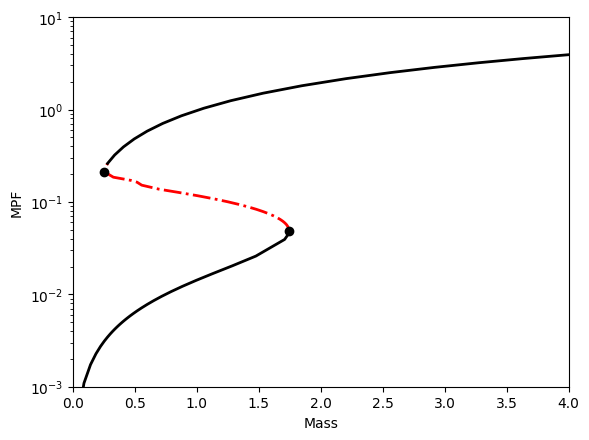

In [24]:
PlotBifurcation(curve_stst, (:Mass, :MPF))
xlim([0, 4])
xlabel("Mass")
ylabel("MPF")
yscale("log")
ylim([0.001, 10]);

**Two parameter bifurcation**: Mass and $V_{c2}$

Three fold points: first limit point (SNIC), second limit point (saddle-node), and Hopf point

In [25]:
namefold1="FO1"
PCargs = ds[:args](name=namefold1)
PCargs[:type] = "LP-C"
PCargs[:initpoint] = "EQ1:LP1"
PCargs[:freepars] = ["Mass", "V_c2"]
PCargs[:StepSize] = 1e-1
PCargs[:MaxNumPoints] = 100
PCargs[:MaxStepSize] = 1e-0
PCargs[:MinStepSize] = 1e-4
PCargs[:SaveEigen] = true
PCargs[:SaveJacobian] = true
PCargs[:LocBifPoints] = ["B"]
PCargs[:StopAtPoints] = ["B"]
PCargs[:verbosity] = 2
PC[:newCurve](PCargs)

In [26]:
PC[:curves][namefold1][:forward]()
PC[:curves][namefold1][:backward]()
curve_fold1 = bifurcation_curve_ccc(PC, "FO1");
#PC[:curves][namefold1][:info]();

B Point found 
0 : 
MPF  =  0.0486036831307
Cdc25_P  =  0.0404944642804
Mass  =  4.00000002534
MPF_P  =  1.69720431288
Wee1  =  0.97664561617
k_m0  =  0.0872903992475

B Point found 
0 : 
MPF  =  0.0486036831296
Cdc25_P  =  0.0404944642789
Mass  =  0.00999999999997
MPF_P  =  1.69720431288
Wee1  =  0.97664561617
k_m0  =  34.9161599203



In [27]:
namefold2="FO2"
PCargs = ds[:args](name=namefold2)
PCargs[:type] = "LP-C"
PCargs[:initpoint] = "EQ1:LP2"
PCargs[:freepars] = ["Mass", "V_c2"]
PCargs[:StepSize] = 1e-1
PCargs[:MaxNumPoints] = 300
PCargs[:MaxStepSize] = 1e-1
PCargs[:MinStepSize] = 1e-6
PCargs[:SaveEigen] = true
PCargs[:verbosity] = 2
PCargs[:LocBifPoints] = ["B"]
PCargs[:StopAtPoints] = ["B"]
PC[:newCurve](PCargs)

In [28]:
PC[:curves][namefold2][:forward]()
PC[:curves][namefold2][:backward]()
curve_fold2 = bifurcation_curve_ccc(PC, namefold2);
#PC[:curves][namefold2][:info]()

B Point found 
0 : 
MPF  =  0.213178412476
Cdc25_P  =  0.968720979288
Mass  =  4.00000006439
MPF_P  =  0.0392712942186
Wee1  =  0.0655929402314
k_m0  =  0.0126224851315

B Point found 
0 : 
MPF  =  0.213178412475
Cdc25_P  =  0.968720979288
Mass  =  0.00999999994812
MPF_P  =  0.0392712942193
Wee1  =  0.065592940233
k_m0  =  5.04899416008



/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 8.6425414575e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)


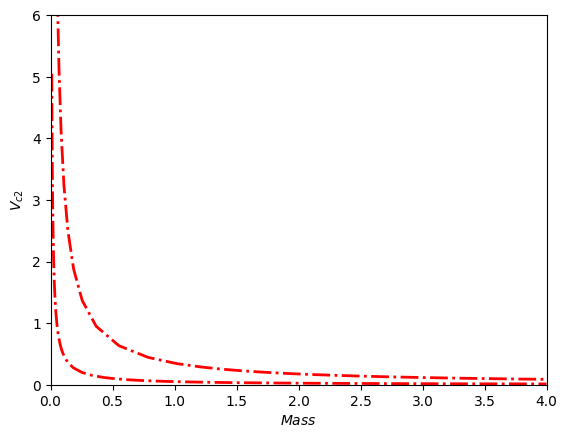

In [29]:
PlotBifurcation(curve_fold1, (:Mass, :V_c2))
PlotBifurcation(curve_fold2, (:Mass, :V_c2))
xlim([0, 4])
xlabel(L"Mass")
ylim([0, 6])
ylabel(L"V_{c2}")
title("")
show()

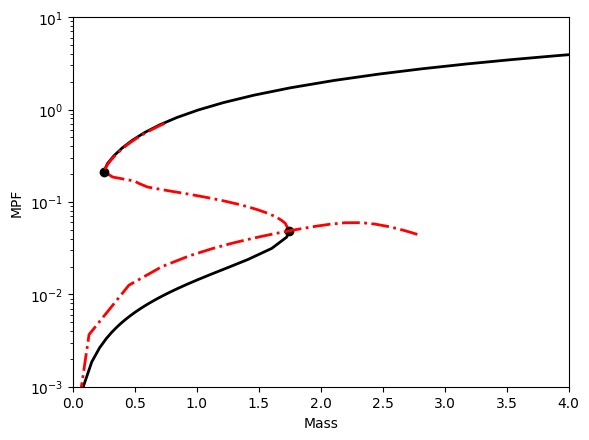

In [29]:
PlotBifurcation(curve_stst, (:Mass, :MPF))
PlotBifurcation(curve_fold1, (:Mass, :MPF))
PlotBifurcation(curve_fold2, (:Mass, :MPF))
xlim([0, 4])
xlabel("Mass")
ylabel("MPF")
yscale("log")
ylim([0.001, 10]);

**Bifurcation plots for mass with Wee1 and Cdc25 in the y-axis**

*Wee1*

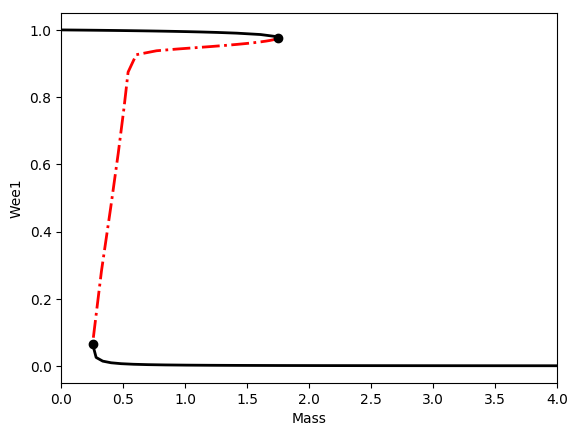

In [50]:
PlotBifurcation(curve_stst, (:Mass, :Wee1))
xlim([0, 4])
xlabel("Mass")
ylabel("Wee1")
#yscale("log")
ylim([-0.05, 1.05]);

Let's make a zoom in the $Wee1\approx 1$ region

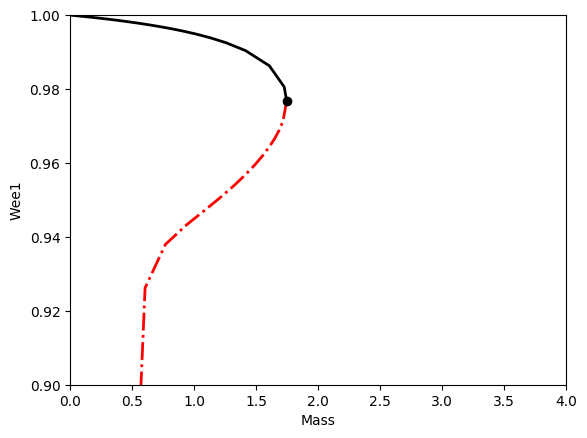

In [43]:
PlotBifurcation(curve_stst, (:Mass, :Wee1))
xlim([0, 4])
xlabel("Mass")
ylabel("Wee1")
#yscale("log")
ylim([0.9, 1.0]);

The value of Wee1 and the saddle-node bifurcation point is close to 0.03 distance appart form 1, while Cdc25 is 0.04 distance appart from 0.

In [36]:
curve_stst.special_points["LP"][1]

Dict{Symbol,Float64} with 5 entries:
  :Cdc25_P => 0.0404945
  :MPF     => 0.0486037
  :Wee1    => 0.976646
  :Mass    => 1.74581
  :MPF_P   => 1.6972

*Cdc25*

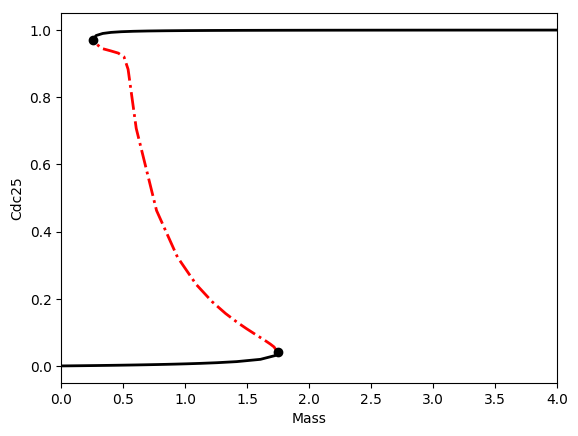

In [47]:
PlotBifurcation(curve_stst, (:Mass, :Cdc25_P))
xlim([0, 4])
xlabel("Mass")
ylabel("Cdc25")
#yscale("log")
ylim([-0.05, 1.05]);

Let's make a zoom also around $Cdc25\approx 0$

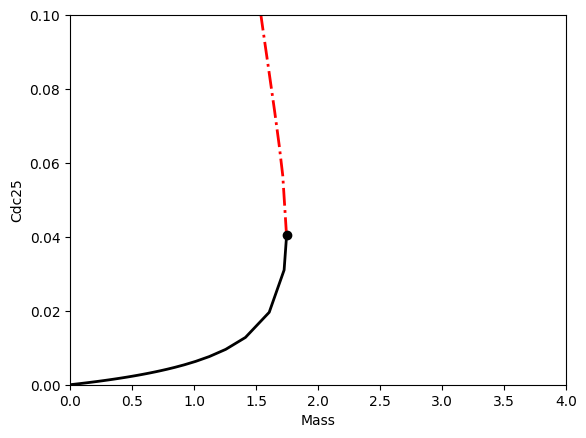

In [44]:
PlotBifurcation(curve_stst, (:Mass, :Cdc25_P))
xlim([0, 4])
xlabel("Mass")
ylabel("Cdc25")
#yscale("log")
ylim([0.0, 0.1]);